Importing the Liabraries


In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Data Collection and Proccessing

In [54]:
# Loading the csv data through a pandas DataFrame
gold_data=pd.read_csv("/content/gld_price_data.csv")


In [55]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [56]:
# getting some information of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [57]:
gold_data.shape

(2290, 6)

In [58]:
#Checking missing data
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [59]:
#geting Statastical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.Possitive Correlation

2.Negative correlation

In [60]:
# Calculate correlation
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

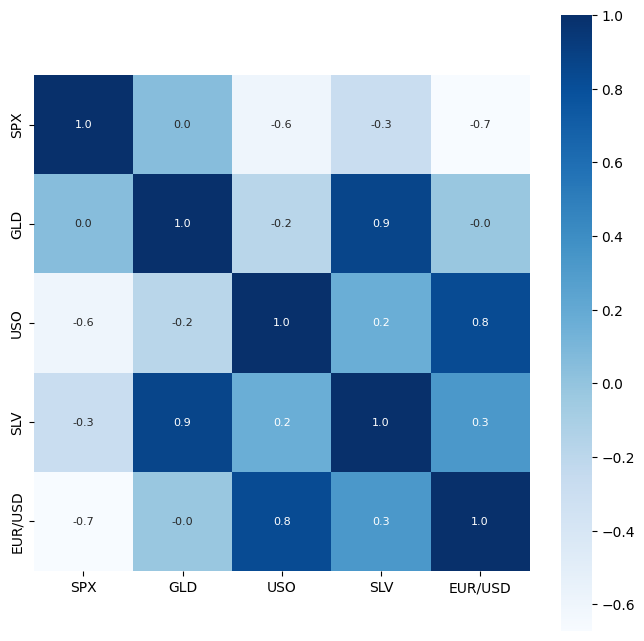

In [61]:
# constructing a head map
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True, cbar=True, square=True, fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [62]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3931475750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

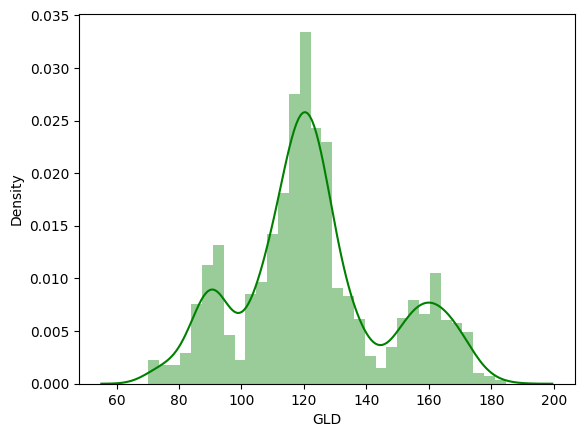

In [63]:
# check the distribution the GLD price
sns.distplot(gold_data['GLD'],color='green')

splitting the feature and target

In [64]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

Splitting into train and test data

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training Rnadom Forest Regressor

In [66]:
regressor=RandomForestRegressor(n_estimators=400)


In [67]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=400)

In [68]:
test_data_prediction=regressor.predict(X_test)

In [69]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9893774607855255


Compare the Actual and predicted values

In [70]:
Y_test=list(Y_test)

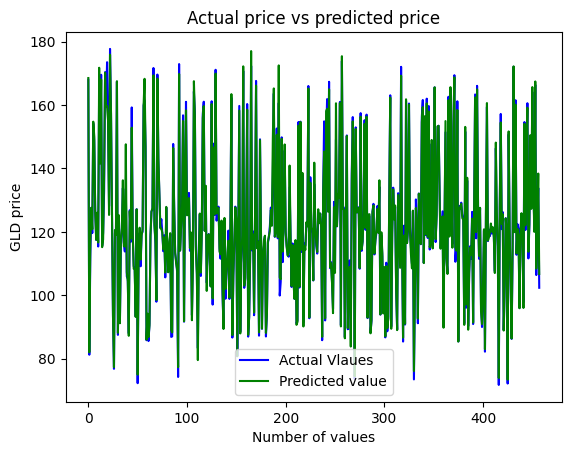

In [71]:
plt.plot(Y_test,color='blue',label='Actual Vlaues')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [72]:

input_data=(1411.630005,77.309998,15.167,1.475492)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)

[85.22172303]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
